In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
%matplotlib inline

**Create functions to load our data and save file names in variables**

In [2]:
filename = 'games.csv'
spells = 'summoner_spell_info.json'
def load_data(file):
    return pd.read_csv(file)

In [3]:
games_full = load_data(filename)

**Create a training and test split using our data. The fullset has almost 50,000 observations so we can use sklearns train_test_split function to use random splitting**

In [4]:
games_train,games_test = train_test_split(games_full,test_size=0.3,random_state=42)


# Exploratory data analysis

Important tasks to do with our data:

1. We need to check for missing values
2. Define our objective
3. Assess importance of features by feature engineering or selection
4. Create functions to clean our data


In [5]:
games_train.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
34146,3324313369,1504130270140,1272,9,1,1,2,1,0,1,...,1,0,0,0,0,238,33,55,141,122
10381,3323015091,1504043975211,1850,9,1,2,2,1,2,1,...,6,0,1,0,0,79,18,40,141,-1
5246,3300652525,1502553170309,1183,9,2,1,2,2,0,2,...,7,2,0,2,1,29,91,245,-1,1
1429,3324777981,1504192424998,2526,9,2,2,1,0,0,2,...,6,0,0,4,0,64,122,157,31,29
11768,3296297981,1502295948125,2928,9,2,2,1,2,1,1,...,8,1,1,1,1,55,57,31,121,141


**This data set contains 61 features in which one feature displays the winning team. I have some domain knowledge of league of legends playing all the way back in season 3-5 but this data is recorded for season 9. It'll be interesting the see the change in team composition, bans and priority toward objectives.** 

**In general objectives are extremely important to winning a game on League of Legends. It provides you leverage over other objectives because you can advance closer to their base and into their jungle. You can plant deeper wards to gain vision for your entire team and global objectives provide either gold or power ups for the entire team.**

**Before feature selection and engineering we need to see if there are any missing values**

In [6]:
games_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36043 entries, 34146 to 15795
Data columns (total 61 columns):
gameId                36043 non-null int64
creationTime          36043 non-null int64
gameDuration          36043 non-null int64
seasonId              36043 non-null int64
winner                36043 non-null int64
firstBlood            36043 non-null int64
firstTower            36043 non-null int64
firstInhibitor        36043 non-null int64
firstBaron            36043 non-null int64
firstDragon           36043 non-null int64
firstRiftHerald       36043 non-null int64
t1_champ1id           36043 non-null int64
t1_champ1_sum1        36043 non-null int64
t1_champ1_sum2        36043 non-null int64
t1_champ2id           36043 non-null int64
t1_champ2_sum1        36043 non-null int64
t1_champ2_sum2        36043 non-null int64
t1_champ3id           36043 non-null int64
t1_champ3_sum1        36043 non-null int64
t1_champ3_sum2        36043 non-null int64
t1_champ4id           36043

In [7]:
games_train.isnull().sum()

gameId                0
creationTime          0
gameDuration          0
seasonId              0
winner                0
firstBlood            0
firstTower            0
firstInhibitor        0
firstBaron            0
firstDragon           0
firstRiftHerald       0
t1_champ1id           0
t1_champ1_sum1        0
t1_champ1_sum2        0
t1_champ2id           0
t1_champ2_sum1        0
t1_champ2_sum2        0
t1_champ3id           0
t1_champ3_sum1        0
t1_champ3_sum2        0
t1_champ4id           0
t1_champ4_sum1        0
t1_champ4_sum2        0
t1_champ5id           0
t1_champ5_sum1        0
t1_champ5_sum2        0
t1_towerKills         0
t1_inhibitorKills     0
t1_baronKills         0
t1_dragonKills        0
                     ..
t1_ban1               0
t1_ban2               0
t1_ban3               0
t1_ban4               0
t1_ban5               0
t2_champ1id           0
t2_champ1_sum1        0
t2_champ1_sum2        0
t2_champ2id           0
t2_champ2_sum1        0
t2_champ2_sum2  

**The data set does not contain any missing values and all columns contain integers. This is pretty fortunate because we don't have to encode any categorical values. However we could turn some columns into categorical data and then encode it later. For example, instead of having 5 separate columns for champion picks on each team, we could aggregate them into a column called Meta. Whether the team consisted of meta champions for that season.**

In [8]:
games_train.describe()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
count,3.604300e+04,3.604300e+04,36043.000000,36043.0,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,...,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000
mean,3.306178e+09,1.502923e+12,1832.562273,9.0,1.494409,1.470466,1.450878,1.309214,0.924257,1.445301,...,5.559221,0.990206,0.413895,1.405682,0.241045,108.330716,108.260439,109.112505,108.759482,108.180840
std,2.949810e+07,1.980498e+09,511.736317,0.0,0.499976,0.520255,0.542970,0.675599,0.841814,0.569242,...,3.857588,1.262807,0.613137,1.224350,0.427724,102.791518,103.370247,102.411018,103.355282,102.891383
min,3.214824e+09,1.496892e+12,190.000000,9.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,3.292195e+09,1.502018e+12,1534.000000,9.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,38.000000,36.000000,38.000000,38.000000,38.000000
50%,3.319965e+09,1.503844e+12,1834.000000,9.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,0.000000,0.000000,1.000000,0.000000,90.000000,90.000000,90.000000,90.000000,90.000000
75%,3.327102e+09,1.504352e+12,2147.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,9.000000,2.000000,1.000000,2.000000,0.000000,141.000000,141.000000,141.000000,141.000000,141.000000
max,3.331833e+09,1.504707e+12,4220.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,11.000000,10.000000,4.000000,6.000000,1.000000,516.000000,516.000000,516.000000,516.000000,516.000000


In [9]:
games_train['winner'].value_counts()

1    18223
2    17820
Name: winner, dtype: int64

**Team 1 won 50.56% of the games and team 2 won 49.44% of the games. It's going to be hard to determine why each team won their game when these numbers are so close. Maybe there was a determinant factor that lead to these games being won?**

**From domain knowledge I can say some important milestones are first blood,first dragon,first tower, first baron, first inhibitor. These were pretty important factors in winning games**

In [10]:
games_train['firstBlood'].value_counts()

1    18310
2    17345
0      388
Name: firstBlood, dtype: int64

**388 games had no first blood meaning there were some early surrenders/remakes. Team 1 has more first bloods than wins, which means they got first blood some games but still ended up losing.**

In [11]:
games_train['firstTower'].value_counts()

1    18090
2    17102
0      851
Name: firstTower, dtype: int64

**It seems that there is a high correlation between first towers and winning a game. However, even though a team took the first tower that does not mean they won. There are so many other factors that should be considered.**

In [12]:
games_train['firstDragon'].value_counts()

2    17438
1    17217
0     1388
Name: firstDragon, dtype: int64

In [13]:
games_train['firstBaron'].value_counts()

0    14239
2    11509
1    10295
Name: firstBaron, dtype: int64

In [14]:
games_train['firstInhibitor'].value_counts()

1    16146
2    15521
0     4376
Name: firstInhibitor, dtype: int64

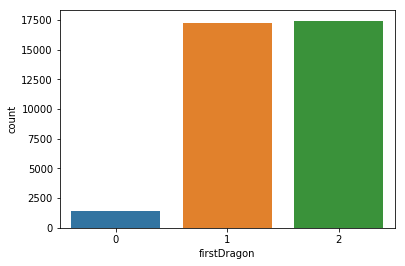

In [15]:
sns.countplot(x='firstDragon',data=games_train)

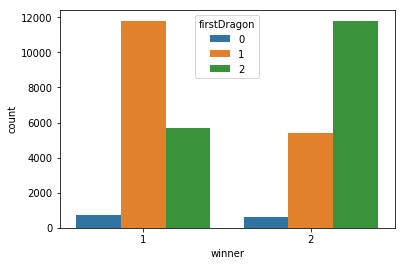

In [16]:
sns.countplot(x='winner',data=games_train,hue='firstDragon')

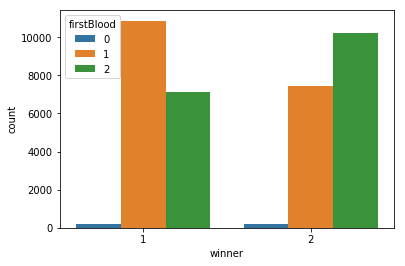

In [17]:
sns.countplot(x='winner',data=games_train,hue='firstBlood')

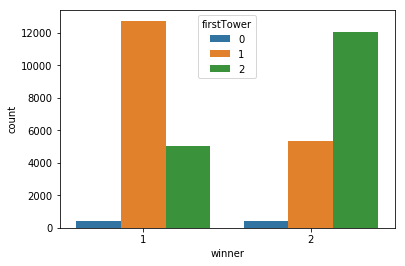

In [18]:
sns.countplot(x='winner',data=games_train,hue='firstTower')

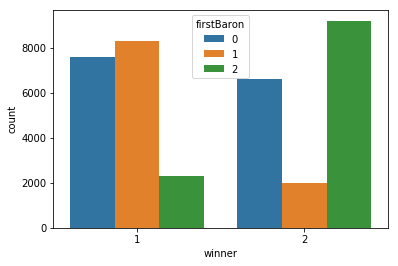

In [19]:
sns.countplot(x='winner',data=games_train,hue='firstBaron')

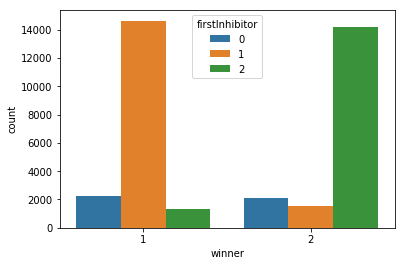

In [20]:
sns.countplot(x='winner',data=games_train,hue='firstInhibitor')

# Comparing these different features:

1. These features all highly correlate with what team won that game. 
2. It seems like global objectives such as towers,dragons, and an extremely high correlation between first inhibitor and winning a game. 
3. First baron does not seem as important but we should take into consideration the length of these games as well. Baron does not spawn until 15 minutes the last time I played. 

In [21]:
corr_matrix = games_train.corr()

In [22]:
corr_matrix['winner'].sort_values(ascending=False)

winner                1.000000
t2_towerKills         0.785619
t2_inhibitorKills     0.659016
firstInhibitor        0.538081
t2_dragonKills        0.499650
t2_baronKills         0.395373
firstTower            0.370933
firstDragon           0.311444
firstBaron            0.258592
t2_riftHeraldKills    0.220375
firstBlood            0.174431
firstRiftHerald       0.114725
t1_champ5id           0.028862
gameDuration          0.025400
t1_champ1id           0.020139
t1_champ3id           0.017530
t1_champ4id           0.017277
creationTime          0.012595
gameId                0.012415
t1_champ2id           0.011424
t1_ban1               0.008550
t2_champ3_sum1        0.006164
t2_champ2_sum2        0.006124
t2_ban2               0.005874
t1_ban2               0.005661
t1_ban4               0.005539
t2_ban3               0.005274
t2_champ5_sum2        0.004576
t2_champ2_sum1        0.004175
t1_champ3_sum1        0.003322
                        ...   
t1_champ5_sum2        0.003005
t1_champ

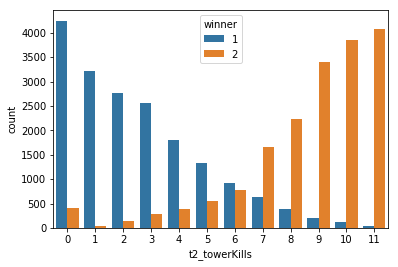

In [23]:
sns.countplot(x='t2_towerKills',data=games_train,hue='winner')

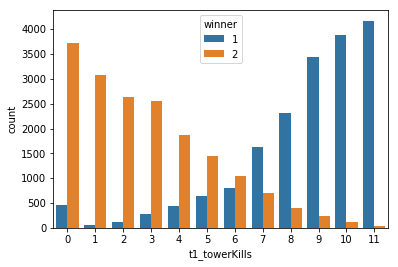

In [24]:
sns.countplot(x='t1_towerKills',data=games_train,hue='winner')

In [25]:
games_train.groupby(['t1_ban1'])['seasonId'].value_counts().sort_values(ascending=False)

t1_ban1  seasonId
157      9           2364
238      9           1758
31       9           1710
122      9           1638
40       9           1437
119      9           1409
53       9           1359
141      9           1179
29       9           1166
154      9           1135
114      9           1055
117      9            935
105      9            934
18       9            905
11       9            818
51       9            656
67       9            601
75       9            559
57       9            500
64       9            488
23       9            423
516      9            420
412      9            420
498      9            405
55       9            404
19       9            393
90       9            383
38       9            382
113      9            346
16       9            344
                     ... 
268      9             25
15       9             25
421      9             23
133      9             21
163      9             21
68       9             21
111      9          

In [26]:
games_train.groupby(['t2_ban1'])['seasonId'].value_counts().sort_values(ascending=False)

t2_ban1  seasonId
157      9           2303
31       9           1783
238      9           1774
40       9           1625
122      9           1617
119      9           1379
53       9           1291
141      9           1256
154      9           1123
29       9           1084
114      9           1043
105      9            958
18       9            942
117      9            929
11       9            800
51       9            748
67       9            597
75       9            541
57       9            522
55       9            457
64       9            438
412      9            435
498      9            433
516      9            413
90       9            397
38       9            387
23       9            380
19       9            370
113      9            370
92       9            350
                     ... 
421      9             21
15       9             20
267      9             20
127      9             20
133      9             18
163      9             18
104      9          

In [27]:
sum_157_1 = 0
sum_157_2 = 0
for i in range(1,3):
    for j in range(1,6):
        if i == 1:
            sum_157_1 += games_train[games_train['t' + str(i) + '_ban' + str(j)] == 157]['t' + str(i) + '_ban' + str(j)].value_counts()
        else:
            sum_157_2 += games_train[games_train['t' + str(i) + '_ban' + str(j)] == 157]['t' + str(i) + '_ban' + str(j)].value_counts()

print('Team 1 banned 157 %s times.' % str(sum_157_1))
print('Team 2 banned 157 %s times.' % str(sum_157_2))


Team 1 banned 157 157    11624
Name: t1_ban1, dtype: int64 times.
Team 2 banned 157 157    11472
Name: t2_ban1, dtype: int64 times.


In [31]:
games_train['gameDuration']=games_train['gameDuration'].apply(lambda x: x/60)

c:\users\krist\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


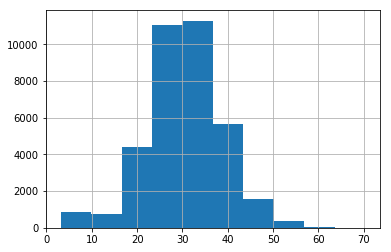

In [34]:
games_train['gameDuration'].hist()

In [131]:
tower = games_train[['firstInhibitor','winner']]

In [132]:
winner_1 = 18223
winner_2 = 17820

In [133]:
(tower[games_train['firstInhibitor']==1][games_train['winner']==1].sum()['winner']/winner_1) * 100

c:\users\krist\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


80.31059649892993

In [68]:
first_tower_win_1

69.90067497119026

In [114]:
def calc_win_percent(team,feature,data,winner):
    win = data[[feature,'winner']]
    if team == 1:
        win = (win[data[feature] == team][data['winner']==team].sum()['winner']/winner) * 100
    else:
        win = ((win[data[feature] == team][data['winner']==team].sum()/2)['winner']/winner) * 100
    return win

In [106]:
first_tower_win_1 = calc_win_percent(1,'firstTower',games_train,winner_1)

c:\users\krist\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [123]:
first_features = []
features = ['firstTower','firstBlood','firstInhibitor','firstDragon','firstBaron']
firstTower_win1 = calc_win_percent(1,'firstTower',games_train,winner_1)
first_features.append(firstTower_win1)

firstTower_win2 = calc_win_percent(2,'firstTower',games_train,winner_2)
first_features.append(firstTower_win2)

firstBlood_win1 = calc_win_percent(1,'firstBlood',games_train,winner_1)
first_features.append(firstBlood_win1)

firstBlood_win2= calc_win_percent(2,'firstBlood',games_train,winner_2)
first_features.append(firstBlood_win2)

firstInhib_win1 = calc_win_percent(1,'firstInhibitor',games_train,winner_1)
first_features.append(firstInhib_win1)

firstInhib_win2 = calc_win_percent(2,'firstInhibitor',games_train,winner_2)
first_features.append(firstInhib_win2)

firstDragon_win1 = calc_win_percent(1,'firstDragon',games_train,winner_1)
first_features.append(firstDragon_win1)

firstDragon_win2 = calc_win_percent(2,'firstDragon',games_train,winner_2)
first_features.append(firstDragon_win2)

firstBaron_win1 = calc_win_percent(1,'firstBaron',games_train,winner_1)
first_features.append(firstBaron_win1)

firstBaron_win2 = calc_win_percent(2,'firstBaron',games_train,winner_2)
first_features.append(firstBaron_win2)


c:\users\krist\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
c:\users\krist\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [150]:
i =0
while i < len(features):
    print('%s:' % features[i])
    
    print('Team 1 - %s win rate '% first_features[2*i])
    print('Team 2- %s win rate ' % first_features[2*i+1])
    i += 1

firstTower:
Team 1 - 69.90067497119026 win rate 
Team 2- 67.71043771043772 win rate 
firstBlood:
Team 1 - 59.61147999780497 win rate 
Team 2- 57.21661054994388 win rate 
firstInhibitor:
Team 1 - 80.31059649892993 win rate 
Team 2- 79.60157126823793 win rate 
firstDragon:
Team 1 - 64.78077155243373 win rate 
Team 2- 66.04377104377105 win rate 
firstBaron:
Team 1 - 45.61268726334852 win rate 
Team 2- 51.65544332210998 win rate 


In [162]:
team =[1,2]

first_team = [first_features[i] for i in range(0,9,2)]
second_team = [first_features[i] for i in range(1,10,2)]

In [178]:
win_probability = pd.DataFrame([first_team,second_team],columns=features,index=[team]).reset_index()

In [183]:
win_probability=win_probability.rename(columns={'level_0':'winner'})

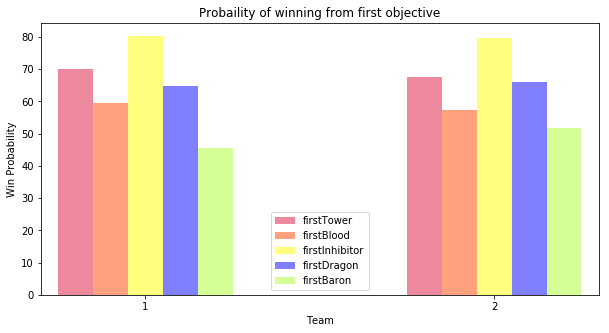

In [222]:
pos = list(range(len(win_probability['winner'])))
width = 0.10

#plotting the bars
fig,ax= plt.subplots(figsize=(10,5))

#create a bar with firstblood data, in position pos

plt.bar(pos,
       win_probability['firstTower'],
       width,
       alpha=0.5,
       color ='#DC143C',
       label=win_probability.columns[1])

plt.bar([p + width for p in pos],
       win_probability['firstBlood'],
       width,
       alpha=0.5,
       color ='#FF4500',
       label=win_probability.columns[2])

plt.bar([p + width*2 for p in pos],
       win_probability['firstInhibitor'],
       width,
       alpha=0.5,
       color ='#FFFF00',
       label=win_probability.columns[3])

plt.bar([p + width*3 for p in pos],
       win_probability['firstDragon'],
       width,
       alpha=0.5,
       color ='#0000FF',
       label=win_probability.columns[4])

plt.bar([p + width*4 for p in pos],
       win_probability['firstBaron'],
       width,
       alpha=0.5,
       color ='#ADFF2F',
       label=win_probability.columns[5])

plt.xlim(min(pos)-width, max(pos)+width*5)
ax.set_ylabel('Win Probability')
ax.set_xlabel('Team')
ax.set_title('Probaility of winning from first objective')
ax.set_xticks([p + 2 * width for p in pos])
ax.set_xticklabels(win_probability['winner'])
plt.legend()

# Features:

We analyze some features to understand which has the potential to impact winning a game. So far it seems that when a team took the first tower, inhibitor or dragon they had the highest chance of winning while taking first blood and baron were not as important. 

I want to see what was the average amount of towers, inhibitors, dragons and barons for each team when they won.
Then I want to see if the champ select/ban phase impacted the win rate.

In [224]:
games_train.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

In [225]:
study = ['t1_towerKills','t1_inhibitorKills','t1_baronKills','t1_dragonKills','t1_riftHeraldKills','t2_towerKills','t2_inhibitorKills','t2_baronKills','t2_dragonKills','t2_riftHeraldKills']
games_train.groupby('winner')[study].mean()

,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
winner,,,,,,,,,,
1,8.586731,1.827142,0.581408,1.953575,0.343083,2.562366,0.167261,0.174175,0.800746,0.147835
2,2.735354,0.190123,0.155387,0.808025,0.154994,8.623850,1.831762,0.659035,2.024299,0.336364


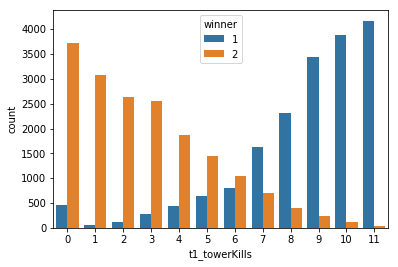

In [226]:
sns.countplot(x='t1_towerKills',data=games_train,hue='winner')

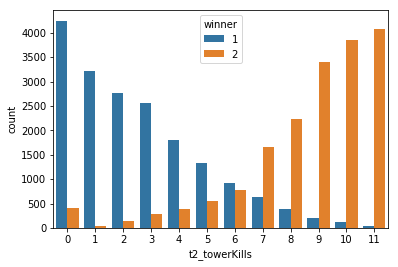

In [227]:
sns.countplot(x='t2_towerKills',data=games_train,hue='winner')